In [3]:
import pickle
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
#import stan
import pandas as pd
from scipy import stats
from datetime import datetime
import time
import math
import scipy.stats

In [4]:
# They integrate to 1 
b0 = pd.read_csv('data/bottom_interpolated.csv', names=['gn1','density'],header=None )
l0 = pd.read_csv('data/light_interpolated.csv', names=['gn1','density'], header=None )
c0 = pd.read_csv('data/charm_interpolated.csv', names=['gn1','density'], header=None )

# parameters to sonstruct the data
pi = [0.2,0.3,0.5]  # proportion expected for each class
                    # slot0: probability of class0 x class0 x class0 x class0
                    # slot1: probability of class1 x class1 x class1 x class1
                    # slot2: probability of class0 x class0 x class1 x class1 (in any order)
theta_prior = [[1.5,2], [5,2.5]]
classes = [1,2]  # which curves to compare, 0=light, 1=charm, 2 = bottom

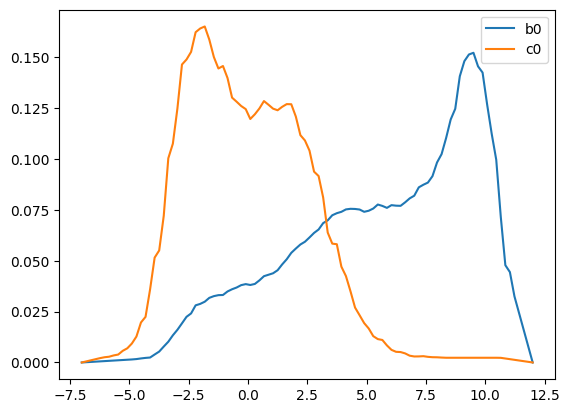

In [5]:
#plt.plot(l0['gn1'],l0['density'],label = 'l0')
plt.plot(b0['gn1'],b0['density'],label = 'b0')
plt.plot(c0['gn1'],c0['density'],label = 'c0')
plt.legend()
plt.show()

In [6]:
# reshape true curves to m bins
m = 25
vec = np.linspace(0,99,m)
myrows = [int(x) for x in vec]
ltrue = l0.iloc[myrows]
ctrue = c0.iloc[myrows]
btrue = b0.iloc[myrows]
ltrue.reset_index(drop=True, inplace=True)
ctrue.reset_index(drop=True, inplace=True)
btrue.reset_index(drop=True, inplace=True)
curves = [ltrue, ctrue, btrue]    
class0 = curves[classes[0]]
class1 = curves[classes[1]]
names = ['$j$','$c$','$b$']
name0 = names[classes[0]]
name1 = names[classes[1]]
classname = [name0, name1]

In [7]:
# determine start, stop and step of binning
start = min(class0['gn1'])
stop = max(class0['gn1'])
m = len(ltrue)  # just to be sure we didn't screw it in thinning the lists
step = (stop - start)/(m-1)
midbins = [start+(i+1/2)*step for i in range(0,m-1)]
edgebins = np.linspace(start,stop,m)
# These are the steps and bins for the betas that are in [0,1] and should be translated to the real start/stop span
start1 = 0
stop1 = 1
step1 = (stop1 - start1)/(m-1)
midbins1 = [start1+(i+1/2)*step1 for i in range(0,m-1)]

In [8]:
# Distributions
prior_distribution = [ [midbins, stats.beta.pdf(midbins1,theta_prior[0][0],theta_prior[0][1])], [midbins, stats.beta.pdf(midbins1,theta_prior[1][0],theta_prior[1][1])] ]
true_distribution = [ [midbins, [ (class0.iloc[i]['density']+class0.iloc[i+1]['density'])/2 for i in range(m-1)] ] , [midbins, [ (class1.iloc[i]['density']+class1.iloc[i+1]['density'])/2 for i in range(m-1)] ] ]

# Make probabilities sum 1
for i in range(len(true_distribution)):
    tmp = sum(true_distribution[i][1])+0.0*(m-1)
    true_distribution[i][1] = [(x+0.0)/tmp for x in true_distribution[i][1]]

for i in range(len(prior_distribution)):
    tmp = sum(prior_distribution[i][1])+0.0*(m-1)
    print(tmp)
    prior_distribution[i][1] = [(x+0.0)/tmp for x in prior_distribution[i][1]]
                                # We ad 0.001 to avoid a "-inf" in log_prior that doe snot enter into c++ STAN code

#print(prior_distribution[0][1])
      

24.052593231775628
24.008779867056607


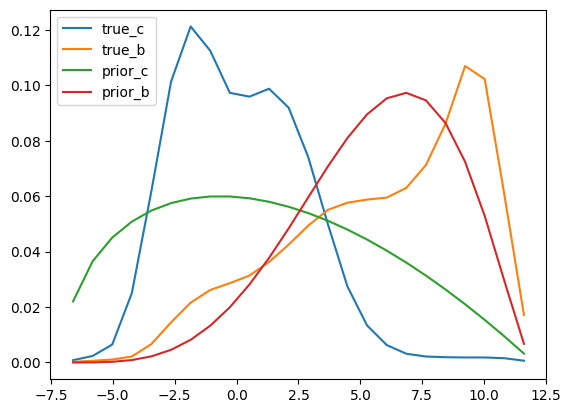

In [24]:
plt.plot(true_distribution[0][0],true_distribution[0][1],label='true_c')
plt.plot(true_distribution[1][0],true_distribution[1][1],label='true_b')

plt.plot(prior_distribution[0][0],prior_distribution[0][1],label='prior_c')
plt.plot(prior_distribution[1][0],prior_distribution[1][1],label='prior_b')

plt.legend()
plt.show()
